# Papcorns Data Scientist Task - Getting Started

This notebook will help you get started with the Papcorns data scientist technical assessment. We'll show you how to:
1. Install requirements and do the imports
2. Connect to the SQLite database
3. Load the data into pandas DataFrames

First, let's import the required libraries:

## Installing Requirements

Let's install the required libraries:

In [152]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Imports

Let's do the imports:

In [153]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set plotting style
# plt.style.use('seaborn')
# sns.set_palette('deep')

## Connecting to the Database

Let's establish a connection to the SQLite database:

In [154]:
# Connect to the SQLite database
conn = sqlite3.connect('papcorns.sqlite')

## Exploring the Data Structure

Let's look at the structure of our tables:

In [155]:
# Load users table
users_df = pd.read_sql_query("SELECT * FROM users LIMIT 5;", conn)
print("Users table preview:")
display(users_df)

# Load events table
events_df = pd.read_sql_query("SELECT * FROM user_events LIMIT 5;", conn)
print("\nUser events table preview:")
display(events_df)

Users table preview:


,id,created_at,attribution_source,country,name
0,1,2024-05-07T00:00:00,instagram,US,Eve Brown
1,2,2024-10-12T00:00:00,instagram,NL,Frank Moore
2,3,2024-10-15T00:00:00,tiktok,TR,Ivy Anderson
3,4,2024-08-28T00:00:00,tiktok,TR,Alice Brown
4,5,2024-04-03T00:00:00,organic,NL,Bob Moore



User events table preview:


,id,created_at,user_id,event_name,amount_usd
0,1,2024-05-07T00:00:00,1,app_install,None
1,2,2024-05-12T00:00:00,1,trial_started,None
2,3,2024-05-24T00:00:00,1,trial_cancelled,None
3,4,2024-10-12T00:00:00,2,app_install,None
4,5,2024-10-13T00:00:00,2,trial_started,None


## Core Tasks (Pandas)



In [156]:
df_1 = pd.read_sql_query("SELECT * FROM users;", conn)
df_2 = pd.read_sql_query("SELECT * FROM user_events;", conn)

In [157]:
print("total row count of users dataframe:", len(df_1))
print("total row count of events dataframe:", len(df_2))


total row count of users dataframe: 1002
total row count of events dataframe: 3486


In [158]:
df_merged = pd.merge(left=df_1, right=df_2, left_on='id', right_on="user_id", suffixes=("_users", "_events")).drop(columns=["user_id", "created_at_events"])
df_merged.tail()

,id_users,created_at_users,attribution_source,country,name,id_events,event_name,amount_usd
3481,1000,2025-02-13T00:00:00,organic,NL,Jack Anderson,3482,trial_cancelled,NaN
3482,1001,2025-02-16T00:00:00,instagram,US,Bruce Wayne,3483,app_install,NaN
3483,1001,2025-02-16T00:00:00,instagram,US,Bruce Wayne,3484,trial_started,NaN
3484,1001,2025-02-16T00:00:00,instagram,US,Bruce Wayne,3485,subscription_started,9.99
3485,1002,2025-02-16T00:00:00,organic,TR,Clark Kent,3486,app_install,NaN


I'll check the column names, data types ect. before I go forward. This is an important step in detecting a poorly structured string expression or data structure in advance. 

In [159]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3486 entries, 0 to 3485
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_users            3486 non-null   int64  
 1   created_at_users    3486 non-null   object 
 2   attribution_source  3486 non-null   object 
 3   country             3486 non-null   object 
 4   name                3486 non-null   object 
 5   id_events           3486 non-null   int64  
 6   event_name          3486 non-null   object 
 7   amount_usd          1231 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 218.0+ KB


In [160]:
df_merged["created_at_users"] = pd.to_datetime(df_merged["created_at_users"])
df_merged

,id_users,created_at_users,attribution_source,country,name,id_events,event_name,amount_usd
0,1,2024-05-07,instagram,US,Eve Brown,1,app_install,NaN
1,1,2024-05-07,instagram,US,Eve Brown,2,trial_started,NaN
2,1,2024-05-07,instagram,US,Eve Brown,3,trial_cancelled,NaN
3,2,2024-10-12,instagram,NL,Frank Moore,4,app_install,NaN
4,2,2024-10-12,instagram,NL,Frank Moore,5,trial_started,NaN
...,...,...,...,...,...,...,...,...
3481,1000,2025-02-13,organic,NL,Jack Anderson,3482,trial_cancelled,NaN
3482,1001,2025-02-16,instagram,US,Bruce Wayne,3483,app_install,NaN
3483,1001,2025-02-16,instagram,US,Bruce Wayne,3484,trial_started,NaN
3484,1001,2025-02-16,instagram,US,Bruce Wayne,3485,subscription_started,9.99


In [161]:
df_merged.columns.tolist()

['id_users',
 'created_at_users',
 'attribution_source',
 'country',
 'name',
 'id_events',
 'event_name',
 'amount_usd']

### 1. Calculate the total revenue generated from subscriptions for each country.


In [162]:
df_merged.groupby(by="country")["amount_usd"].sum()

country
NL    3335.29
TR    2275.44
US    4035.96
Name: amount_usd, dtype: float64

Eventhough it is a solution, let's look deeper the NaN values on the column "amount_usd"

The info() method showed us quite high rate of the data is missed on the column "amount_usd". There is only 1231/3486 data is described. Let's check if it's efficient to fill them weather not.


In [163]:
# analysis 1.1
df_merged.loc[:, ["attribution_source", "event_name", "amount_usd"]]

,attribution_source,event_name,amount_usd
0,instagram,app_install,NaN
1,instagram,trial_started,NaN
2,instagram,trial_cancelled,NaN
3,instagram,app_install,NaN
4,instagram,trial_started,NaN
...,...,...,...
3481,organic,trial_cancelled,NaN
3482,instagram,app_install,NaN
3483,instagram,trial_started,NaN
3484,instagram,subscription_started,9.99


Let's group this by attribution_source and event_name and see if the amount will be same.

In [164]:
# analysis 1.2
df_merged.groupby(["attribution_source", "event_name"])["amount_usd"].agg(["count", "nunique", "mean", "std", "min", "max"]) 

count  nunique      mean       std  \
attribution_source event_name                                                   
instagram          app_install                 0        0       NaN       NaN   
                   subscription_cancelled      0        0       NaN       NaN   
                   subscription_renewed      237        3  7.757932  2.205767   
                   subscription_started      149        3  7.835638  2.189424   
                   trial_cancelled             0        0       NaN       NaN   
                   trial_started               0        0       NaN       NaN   
organic            app_install                 0        0       NaN       NaN   
                   subscription_cancelled      0        0       NaN       NaN   
                   subscription_renewed      275        3  7.822727  2.231416   
                   subscription_started      169        3  7.913077  2.238728   
                   trial_cancelled             0        0       NaN       NaN   
                   trial_started               0        0       NaN       NaN   
tiktok             app_install                 0        0       NaN       NaN   
                   subscription_cancelled      0        0       NaN       NaN   
                   subscription_renewed      238        3  7.796723  2.266160   
                   subscription_started      163        3  7.953190  2.188324   
                   trial_cancelled             0        0       NaN       NaN   
                   trial_started               0        0       NaN       NaN   

                                            min   max  
attribution_source event_name                          
instagram          app_install              NaN   NaN  
                   subscription_cancelled   NaN   NaN  
                   subscription_renewed    4.99  9.99  
                   subscription_started    4.99  9.99  
                   trial_cancelled          NaN   NaN  
                   trial_started            NaN   NaN  
organic            app_install              NaN   NaN  
                   subscription_cancelled   NaN   NaN  
                   subscription_renewed    4.99  9.99  
                   subscription_started    4.99  9.99  
                   trial_cancelled          NaN   NaN  
                   trial_started            NaN   NaN  
tiktok             app_install              NaN   NaN  
                   subscription_cancelled   NaN   NaN  
                   subscription_renewed    4.99  9.99  
                   subscription_started    4.99  9.99  
                   trial_cancelled          NaN   NaN  
                   trial_started            NaN   NaN

It seems that some event_names belonging to the attribution_sources column do not have any data, while others have all of them. Also, the data we have for these groups only has three unique amount_usd values. It can be assumed that these also change depending on the time data. Let's see if that's the case...

In [165]:
# analysis 1.3
print("Is there any NaN value for tag 'subscription_renewed'?", df_merged[df_merged["event_name"] == "subscription_renewed"].isna().any().any())
print("Is there any NaN value for tag 'subscription_started'?", df_merged[df_merged["event_name"] == "subscription_started"].isna().any().any())

Is there any NaN value for tag 'subscription_renewed'? False
Is there any NaN value for tag 'subscription_started'? False


This shows us that all of the NaN values ​​for amount_usd belong to rows where the event_name is not subscription_renewed or subscription_started.

In [166]:
df_temp_1 = df_merged[df_merged['attribution_source'] == "instagram"]
df_temp_1 = df_temp_1.sample(100).sort_values(by="created_at_users") # we got a sample to display data better

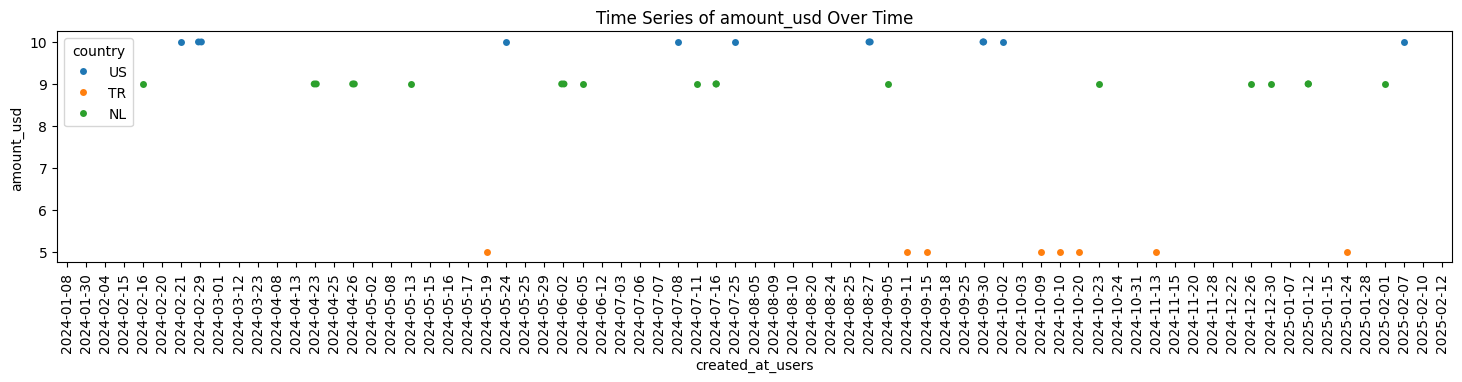

In [167]:
# analysis 1.4
plt.figure(figsize=(18,3))
sns.stripplot(data=df_temp_1, x="created_at_users", y="amount_usd", marker='o', hue='country')
plt.xticks(rotation=90)
plt.title("Time Series of amount_usd Over Time")
plt.show()

**The result: amount_usd is only valid for zero event_names "subscription_renewed" and "subscription_started", and each country has its own pricing system. This system has remained constant over time, with no increases or decreases over a period of about a year.**

### 2. Calculate the total number of trials given to users who came from Instagram.

In [168]:
df_merged

,id_users,created_at_users,attribution_source,country,name,id_events,event_name,amount_usd
0,1,2024-05-07,instagram,US,Eve Brown,1,app_install,NaN
1,1,2024-05-07,instagram,US,Eve Brown,2,trial_started,NaN
2,1,2024-05-07,instagram,US,Eve Brown,3,trial_cancelled,NaN
3,2,2024-10-12,instagram,NL,Frank Moore,4,app_install,NaN
4,2,2024-10-12,instagram,NL,Frank Moore,5,trial_started,NaN
...,...,...,...,...,...,...,...,...
3481,1000,2025-02-13,organic,NL,Jack Anderson,3482,trial_cancelled,NaN
3482,1001,2025-02-16,instagram,US,Bruce Wayne,3483,app_install,NaN
3483,1001,2025-02-16,instagram,US,Bruce Wayne,3484,trial_started,NaN
3484,1001,2025-02-16,instagram,US,Bruce Wayne,3485,subscription_started,9.99


In [169]:
# The following custom filtered data table's row count provides the desired information.
df_merged[(df_merged["attribution_source"] == "instagram") & (df_merged["event_name"] == "trial_cancelled")].shape[0]

61

### 3. Create a new column named 'acquisition_channel' by categorizing users based on their 'attribution_source':
●  **'Paid': users from instagram or tiktok**

●  **'Organic': users from organic sources**


In [170]:
# This time we don't need to proceed through the merged table. The Users table seems to be sufficient.
df_1["acquisition_channel"] = df_1["attribution_source"].map({
    "instagram": "paid",
    "tiktok": "paid",
    "organic": "organic"
})
df_1

,id,created_at,attribution_source,country,name,acquisition_channel
0,1,2024-05-07T00:00:00,instagram,US,Eve Brown,paid
1,2,2024-10-12T00:00:00,instagram,NL,Frank Moore,paid
2,3,2024-10-15T00:00:00,tiktok,TR,Ivy Anderson,paid
3,4,2024-08-28T00:00:00,tiktok,TR,Alice Brown,paid
4,5,2024-04-03T00:00:00,organic,NL,Bob Moore,organic
...,...,...,...,...,...,...
997,998,2025-02-01T00:00:00,instagram,TR,Bob Davis,paid
998,999,2024-12-24T00:00:00,organic,NL,Charlie Davis,organic
999,1000,2025-02-13T00:00:00,organic,NL,Jack Anderson,organic
1000,1001,2025-02-16T00:00:00,instagram,US,Bruce Wayne,paid


In [171]:
# In other way (actually I usually prefer this one by habit)
df_1["acquisition_channel_2"] = np.where(
    df_1["attribution_source"].isin(["instagram", "tiktok"]), "paid",
    np.where(df_1["attribution_source"] == "organic", "organic", None)
)
df_1

,id,created_at,attribution_source,country,name,acquisition_channel,acquisition_channel_2
0,1,2024-05-07T00:00:00,instagram,US,Eve Brown,paid,paid
1,2,2024-10-12T00:00:00,instagram,NL,Frank Moore,paid,paid
2,3,2024-10-15T00:00:00,tiktok,TR,Ivy Anderson,paid,paid
3,4,2024-08-28T00:00:00,tiktok,TR,Alice Brown,paid,paid
4,5,2024-04-03T00:00:00,organic,NL,Bob Moore,organic,organic
...,...,...,...,...,...,...,...
997,998,2025-02-01T00:00:00,instagram,TR,Bob Davis,paid,paid
998,999,2024-12-24T00:00:00,organic,NL,Charlie Davis,organic,organic
999,1000,2025-02-13T00:00:00,organic,NL,Jack Anderson,organic,organic
1000,1001,2025-02-16T00:00:00,instagram,US,Bruce Wayne,paid,paid


### 4. Analyze the trial-to-subscription conversion rate

#### 4.1) Calculate the overall conversion rate

In [172]:
# First lets get the users who start the trial.
users_start_trial = df_2[df_2['event_name'] == "trial_started"]
print("Number of users who start trial:", users_start_trial.shape[0])

Number of users who start trial: 682


In [173]:
# Secondly lets check how many user have a "subscription_started" event among users_start_trial
users_subs = df_2[(df_2['user_id'].isin(users_start_trial.user_id)) & (df_2['event_name'] == "subscription_started")]
print("Number of users who start subscription:", users_subs.shape[0])

Number of users who start subscription: 481


In [174]:
print("Overall conversion rate:", round(users_subs.shape[0]/users_start_trial.shape[0], 2))

Overall conversion rate: 0.71


#### 4.2) Break down the conversion rate by attribution_source

In [175]:
# we have to redefine users_start_trial using df_merged
users_start_trial = df_merged[df_merged['event_name'] == "trial_started"]
users_start_trial.groupby("attribution_source").count()['id_users']

attribution_source
instagram    210
organic      236
tiktok       236
Name: id_users, dtype: int64

In [176]:
users_subs = df_merged[(df_merged['id_users'].isin(users_start_trial.id_users)) & (df_merged['event_name'] == "subscription_started")]
users_subs.groupby("attribution_source").count()['id_users']

attribution_source
instagram    149
organic      169
tiktok       163
Name: id_users, dtype: int64

In above, I wanted to show how the number of users who started the trial and subscribed changed when we divided them into groups for attribution source. Now let's compare them quickly:

In [177]:
conversion_rate = (
    users_subs.groupby("attribution_source").count()['id_users']
    .divide(users_start_trial.groupby("attribution_source").count()['id_users'])
)
print("trial-to-subscription conversion rates grouped by attribution_source:")
print(conversion_rate)

trial-to-subscription conversion rates grouped by attribution_source:
attribution_source
instagram    0.709524
organic      0.716102
tiktok       0.690678
Name: id_users, dtype: float64


### 5. Calculate the median subscription duration (in months) for each country

In [178]:
# df_merged is utilzed because "created_at_users" is already being converted into datetime for that.
print(df_merged.groupby("country")["created_at_users"].median())

country
NL   2024-07-16
TR   2024-08-03
US   2024-07-22
Name: created_at_users, dtype: datetime64[ns]


In [ ]:
# Since the "in months" is insisted:
df_merged["created_at_users"] = df_merged["created_at_users"].dt.to_period("M")
print(df_merged.groupby("country")["created_at_users"].median())

country
NL    2024-07
TR    2024-08
US    2024-07
Name: created_at_users, dtype: period[M]


### 6. Calculate the Average Lifetime Value (LTV) by country


Okay, the LTV represents the total revenue generated per user over their lifetime in your dataset.

In [181]:
# Sum of revenue per country
total_revenue = df_merged.groupby("country")["amount_usd"].sum()

In [182]:
# Unique number of users per country
total_users = df_merged.groupby("country")["id_users"].nunique()

In [183]:
# LTV per country
ltv_per_country = (total_revenue / total_users).fillna(0)

In [186]:
print("Average Lifetime Value (LTV) by Country")
print(ltv_per_country)

Average Lifetime Value (LTV) by Country
country
NL    10.828864
TR     6.427797
US    11.870471
dtype: float64
